In [ ]:
# The purpose of this code is to develop a GIF with a map of Minnesota (MN) successively adding MN state highways-just for fun

In [65]:
import pandas as pd
import geopandas as gpd
import descartes
import matplotlib.pyplot as plt
import numpy as np
import shapely.geometry

In [5]:
roads = 'STREETS_LOAD.shp'

In [80]:
states = '/Users/matthewwilliamhaas/Documents/shapefile_data_sources/cb_2018_us_county_20m/cb_2018_us_county_20m.shp'
map_states = gpd.read_file(states) # read in counties

In [83]:
MN = map_states[(map_states.STATEFP == '27')]
MN = MN.to_crs({'init' : 'epsg:26915'})

In [6]:
# read in data
road_data = gpd.read_file(roads)

In [123]:
# subset data so we can map each highway independently
MN61 = road_data.STREET_NAM == 'MNTH 61'
MN36 = road_data.STREET_NAM == 'MNTH 36'
MN280 = road_data.STREET_NAM == 'MNTH 280'

In [124]:
# needed to plot positions of highways
MN61_data = road_data[(MN61)].geometry
MN36_data = road_data[(MN36)].geometry
MN280_data = road_data[(MN280)].geometry

In [69]:
# used this code for the map of MN and WI--not sure if it will be useful here or not
#TH61 = TH61.to_crs({"init" : "epsg:26915"})

In [127]:
# load image to add to figure
im = plt.imread('/Users/matthewwilliamhaas/Documents/MN_highway_signs/MN-61.png')

(-0.5, 119.5, 119.5, -0.5)

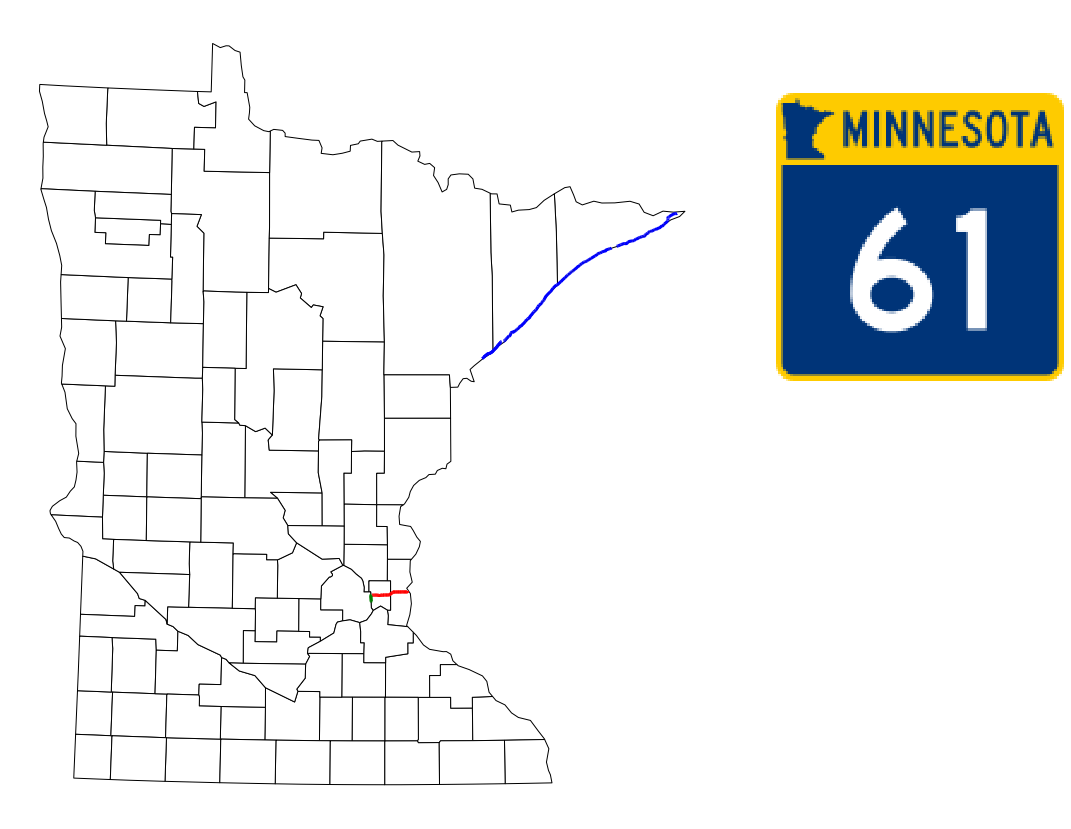

In [139]:
# do the plotting
fig, ax = plt.subplots(1, figsize = (20,15))
MN.plot(color = 'white', linewidth = 1.0, ax = ax, edgecolor = 'black')
MN61_data.plot(color = 'blue', linewidth = 3.0, ax = ax, edgecolor = 'black')
MN36_data.plot(color ='red', linewidth = 3.0, ax = ax, edgecolor = 'black')
MN280_data.plot(color = 'green', linewidth = 3.0, ax = ax, edgecolor = 'black')
#ax.plot(range(10))
newax = fig.add_axes([0.8, 0.5, 0.2, 0.3], anchor = 'NE', zorder = 1)
newax.imshow(im)
ax.axis('off') # turn off the axis
newax.axis('off')